<a href="https://colab.research.google.com/github/Jacin21/Task6-8/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [ ]:
df = pd.read_csv("car_data.csv")
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


Part 1

Find the linear regression equation for mileage vs price.

In [ ]:
df['Mileage']=df['Mileage'].to_frame()
df['Price']=df['Price'].to_frame()
df['Mileage']

0       8221
1       9135
2      13196
3      16342
4      19832
       ...  
799    16229
800    19095
801    20484
802    25979
803    35662
Name: Mileage, Length: 804, dtype: int64

In [ ]:
x=df['Mileage']
x = x.to_frame()
y=df['Price']

In [ ]:
from sklearn import linear_model
linreg = linear_model.LinearRegression()
linreg.fit(x,y)

LinearRegression()

In [ ]:
print('intercept:', linreg.intercept_)
print('coefficient:', linreg.coef_)

intercept: 24764.559006061685
coefficient: [-0.1725205]


Chart the original data and the equation on the chart.

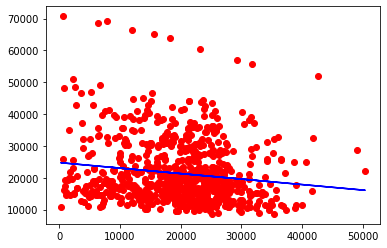

In [ ]:
plt.scatter(x, y, color='red')
plt.plot(x, linreg.predict(x), color='blue')

Find the equation's  R2  score 

In [ ]:
linreg.score(x, y)

0.02046344732348926

Part 2

Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [ ]:
f=['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']
x=df[f]
y=df['Price']

In [ ]:
linreg = linear_model.LinearRegression()
linreg.fit(x,y)

LinearRegression()

In [ ]:
print('intercept:', linreg.intercept_)
print('coefficient:', linreg.coef_)

intercept: 6758.755143598106
coefficient: [-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
  6.28899715e+03 -1.99379528e+03  3.34936162e+03]


Find the equation's  R2  score

In [ ]:
linreg.score(x,y)

0.4462643536728379

Find the combination of the factors that is the best predictor for price.

In [ ]:
coeff_df = pd.DataFrame(linreg.coef_,['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather'],columns = ['Coefficient'])
coeff_df

,Coefficient
Mileage,-0.169748
Cylinder,3792.378931
Liter,-787.220732
Doors,-1542.745846
Cruise,6288.997150
Sound,-1993.795276
Leather,3349.361620


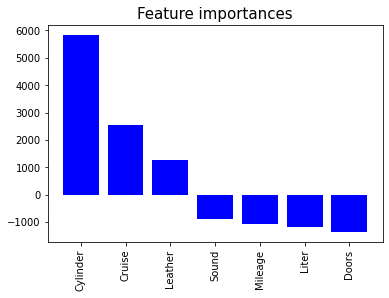

In [ ]:
data={
    'Attribute': ['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather'],
    'Importance': [-1083.51949546,  5844.05042523, -1171.72086432, -1381.19724291,
        2553.49235807,  -895.06576058,  1252.05872321]
}
importances = pd.DataFrame(data)
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='blue')
plt.title('Feature importances', size=15)
plt.xticks(rotation='vertical')
plt.show()

From the above graph we can see the Cylinder has the highiest absolute values of coefficient

In [ ]:
def fact(F):
  if F:
    result = fact(F[:-1])
    return result + [i+[F[-1]] for i in result]
  else:
    return [[]]
combination = fact(['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather'])
combination = combination[1:]
print(combination)

[['Mileage'], ['Cylinder'], ['Mileage', 'Cylinder'], ['Liter'], ['Mileage', 'Liter'], ['Cylinder', 'Liter'], ['Mileage', 'Cylinder', 'Liter'], ['Doors'], ['Mileage', 'Doors'], ['Cylinder', 'Doors'], ['Mileage', 'Cylinder', 'Doors'], ['Liter', 'Doors'], ['Mileage', 'Liter', 'Doors'], ['Cylinder', 'Liter', 'Doors'], ['Mileage', 'Cylinder', 'Liter', 'Doors'], ['Cruise'], ['Mileage', 'Cruise'], ['Cylinder', 'Cruise'], ['Mileage', 'Cylinder', 'Cruise'], ['Liter', 'Cruise'], ['Mileage', 'Liter', 'Cruise'], ['Cylinder', 'Liter', 'Cruise'], ['Mileage', 'Cylinder', 'Liter', 'Cruise'], ['Doors', 'Cruise'], ['Mileage', 'Doors', 'Cruise'], ['Cylinder', 'Doors', 'Cruise'], ['Mileage', 'Cylinder', 'Doors', 'Cruise'], ['Liter', 'Doors', 'Cruise'], ['Mileage', 'Liter', 'Doors', 'Cruise'], ['Cylinder', 'Liter', 'Doors', 'Cruise'], ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise'], ['Sound'], ['Mileage', 'Sound'], ['Cylinder', 'Sound'], ['Mileage', 'Cylinder', 'Sound'], ['Liter', 'Sound'], ['Mileage',

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [ ]:
R2_Score = []
for i in combination:
    X = df[i].values
    y = df.loc[:,'Price'].values
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=200)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train) 
    X_test_scaled = scaler.transform(X_test)

    regressor = linear_model.LinearRegression()
    regressor.fit(X_train_scaled,y_train)
    y_predict = regressor.predict(X_test_scaled)
   
    R2_Score.append(metrics.r2_score(y_test,y_predict))

In [ ]:
df_ = pd.DataFrame({'Feature Combination':combination,'R2 Score':R2_Score})
df_

,Feature Combination,R2 Score
0,[Mileage],-0.013001
1,[Cylinder],0.323626
2,"[Mileage, Cylinder]",0.317725
3,[Liter],0.329412
4,"[Mileage, Liter]",0.330573
...,...,...
122,"[Mileage, Cylinder, Doors, Cruise, Sound, Leat...",0.347955
123,"[Liter, Doors, Cruise, Sound, Leather]",0.333669
124,"[Mileage, Liter, Doors, Cruise, Sound, Leather]",0.346957
125,"[Cylinder, Liter, Doors, Cruise, Sound, Leather]",0.333524


In [ ]:
df_['R2 Score'].max()

0.38431998322266625

In [ ]:
df_['R2 Score'].argmax()


52

In [ ]:
df_['Feature Combination'][df_['R2 Score'].argmax()]

['Mileage', 'Liter', 'Cruise', 'Sound']

The best R2 score value is 0.38431998322266625 and there might be other values which are nearer to the best R2 score. So we can use EDA coefficient.


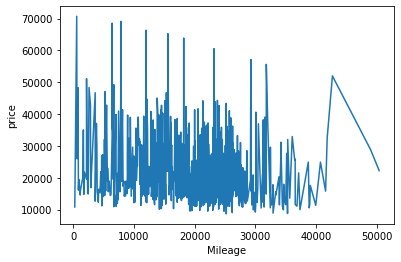

          Mileage     Price
Mileage  1.000000 -0.143051
Price   -0.143051  1.000000


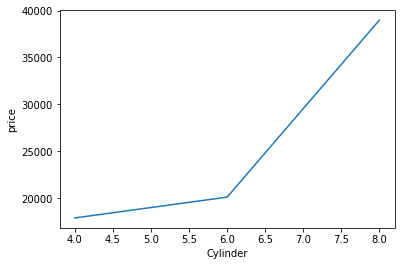

          Cylinder     Price
Cylinder  1.000000  0.569086
Price     0.569086  1.000000


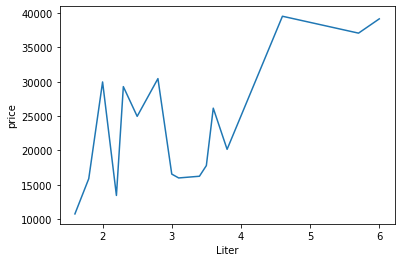

          Liter     Price
Liter  1.000000  0.558146
Price  0.558146  1.000000


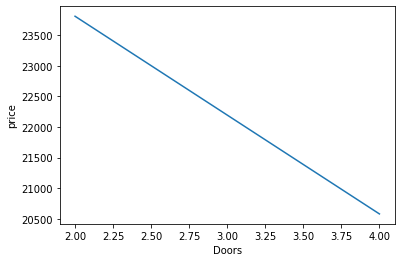

         Doors    Price
Doors  1.00000 -0.13875
Price -0.13875  1.00000


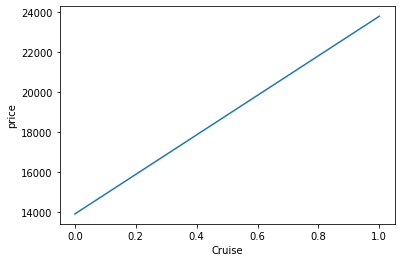

          Cruise     Price
Cruise  1.000000  0.430851
Price   0.430851  1.000000


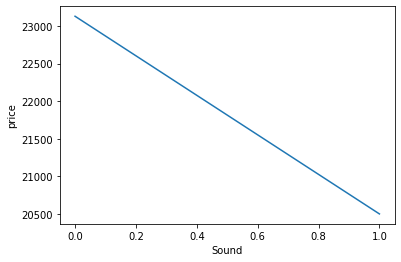

          Sound     Price
Sound  1.000000 -0.124348
Price -0.124348  1.000000


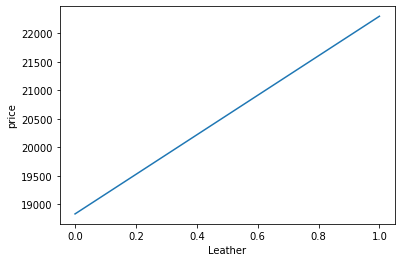

          Leather     Price
Leather  1.000000  0.157197
Price    0.157197  1.000000


In [ ]:
def plotting():
    for i in ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'):
      df.groupby(df[i])['Price'].mean().plot()
    
      plt.xlabel(i)
      plt.ylabel('price')
      plt.show()
      print(df[[i,'Price']].corr())

plotting()

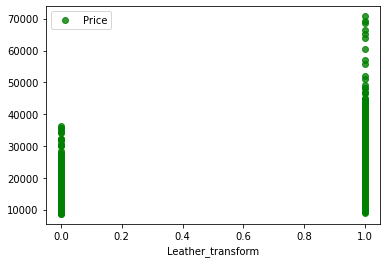

In [ ]:
df['Leather_transform'] = np.power(df['Leather'],3)
df.plot(x='Leather_transform',y='Price',style='o',color='green',alpha=0.8)
plt.show()

In [ ]:
df[['Leather_transform','Price']].corr()


,Leather_transform,Price
Leather_transform,1.000000,0.157197
Price,0.157197,1.000000


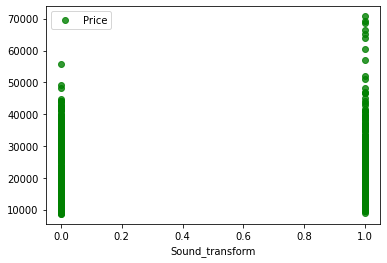

In [ ]:
df['Sound_transform'] = np.power(df['Sound'],3)
df.plot(x='Sound_transform',y='Price',style='o',color='green',alpha=0.8)
plt.show()


In [ ]:
df[['Sound_transform','Price']].corr()

,Sound_transform,Price
Sound_transform,1.000000,-0.124348
Price,-0.124348,1.000000


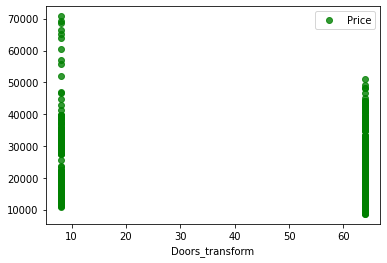

In [ ]:
df['Doors_transform'] = np.power(df['Doors'],3)
df.plot(x='Doors_transform',y='Price',style='o',color='green',alpha=0.8)
plt.show()


In [ ]:
df[['Doors_transform','Price']].corr()


,Doors_transform,Price
Doors_transform,1.00000,-0.13875
Price,-0.13875,1.00000


From the above graph we can see that there is no relationship between Price and 'Mileage','Doors','Sound' and 'Leather'.

In [ ]:
X = df[['Cylinder','Liter','Cruise']].values
y = df['Price'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=200)

In [ ]:
regressor =linear_model.LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
print("R2 Score :", metrics.r2_score(y_test,y_pred))

R2 Score : 0.37625592173388434


In [ ]:
df_Pred = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df_Pred

,Actual,Predicted
0,13072.841631,12434.867329
1,12383.402811,18859.296443
2,26698.078151,18828.614073
3,18566.070703,25798.219241
4,19641.741902,25798.219241
...,...,...
237,42773.028390,32553.047816
238,13174.071009,12434.867329
239,15395.010874,18859.296443
240,29612.154048,18920.661184


Part 3

Research dummy variables in scikit-learn to see how to use the make, model, and body type.

In [ ]:
data = pd.read_csv("car_data.csv",usecols=['Price','Make','Model','Trim','Type'])
data.head()

,Price,Make,Model,Trim,Type
0,17314.103129,Buick,Century,Sedan 4D,Sedan
1,17542.036083,Buick,Century,Sedan 4D,Sedan
2,16218.847862,Buick,Century,Sedan 4D,Sedan
3,16336.913140,Buick,Century,Sedan 4D,Sedan
4,16339.170324,Buick,Century,Sedan 4D,Sedan


In [ ]:
dummies = pd.get_dummies(data[['Make','Model','Trim','Type']])
dummies

,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9-2X AWD,Model_9_3,Model_9_3 HO,Model_9_5,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
merged = pd.concat([data,dummies],axis='columns')
merged

,Price,Make,Model,Trim,Type,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,Buick,Century,Sedan 4D,Sedan,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,17542.036083,Buick,Century,Sedan 4D,Sedan,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,16218.847862,Buick,Century,Sedan 4D,Sedan,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,16336.913140,Buick,Century,Sedan 4D,Sedan,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,16339.170324,Buick,Century,Sedan 4D,Sedan,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,Saturn,L Series,L300 Sedan 4D,Sedan,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,Saturn,L Series,L300 Sedan 4D,Sedan,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,Saturn,L Series,L300 Sedan 4D,Sedan,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,Saturn,L Series,L300 Sedan 4D,Sedan,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
final = merged.drop(['Make','Model','Trim','Type'],axis='columns')
final


,Price,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9-2X AWD,Model_9_3,Model_9_3 HO,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,17542.036083,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,16218.847862,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,16336.913140,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,16339.170324,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
X = final.drop('Price',axis='columns')
X


,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9-2X AWD,Model_9_3,Model_9_3 HO,Model_9_5,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
y = final['Price']
y


0      17314.103129
1      17542.036083
2      16218.847862
3      16336.913140
4      16339.170324
           ...     
799    16507.070267
800    16175.957604
801    15731.132897
802    15118.893228
803    13585.636802
Name: Price, Length: 804, dtype: float64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=300)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [ ]:
regressor =linear_model.LinearRegression() 
regressor.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
y_predict = regressor.predict(X_test_scaled)
print("R2 Score :", metrics.r2_score(y_test,y_predict))

R2 Score : 0.9650539560353361


Find the best combination of factors to predict price

In [ ]:
df = pd.read_csv('car_data.csv')
encode = ['Make','Model','Type','Trim']

In [ ]:
def combinations(F1):
  if F1:
    result = combinations(F1[:-1])
    return result + [i+[F1[-1]] for i in result]
  else:
    return [[]]
comb = combinations(['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather','Make','Model','Trim','Type'])
comb = comb[1:]
print(comb)

[['Mileage'], ['Cylinder'], ['Mileage', 'Cylinder'], ['Liter'], ['Mileage', 'Liter'], ['Cylinder', 'Liter'], ['Mileage', 'Cylinder', 'Liter'], ['Doors'], ['Mileage', 'Doors'], ['Cylinder', 'Doors'], ['Mileage', 'Cylinder', 'Doors'], ['Liter', 'Doors'], ['Mileage', 'Liter', 'Doors'], ['Cylinder', 'Liter', 'Doors'], ['Mileage', 'Cylinder', 'Liter', 'Doors'], ['Cruise'], ['Mileage', 'Cruise'], ['Cylinder', 'Cruise'], ['Mileage', 'Cylinder', 'Cruise'], ['Liter', 'Cruise'], ['Mileage', 'Liter', 'Cruise'], ['Cylinder', 'Liter', 'Cruise'], ['Mileage', 'Cylinder', 'Liter', 'Cruise'], ['Doors', 'Cruise'], ['Mileage', 'Doors', 'Cruise'], ['Cylinder', 'Doors', 'Cruise'], ['Mileage', 'Cylinder', 'Doors', 'Cruise'], ['Liter', 'Doors', 'Cruise'], ['Mileage', 'Liter', 'Doors', 'Cruise'], ['Cylinder', 'Liter', 'Doors', 'Cruise'], ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise'], ['Sound'], ['Mileage', 'Sound'], ['Cylinder', 'Sound'], ['Mileage', 'Cylinder', 'Sound'], ['Liter', 'Sound'], ['Mileage',

In [ ]:
R2Score = []
for i in comb:
  X = df[i]
  y = df['Price'].values
  X = pd.get_dummies(X,columns=[j for j in encode if j in X.columns])
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=20)

  if 'Mileage' in X_train:
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train) 
    X_test_scaled = scaler.transform(X_test)
  regressor = linear_model.LinearRegression() 
  regressor.fit(X_train_scaled,y_train)
  y_predict = regressor.predict(X_test_scaled)
  R2Score.append(metrics.r2_score(y_test,y_predict))

In [ ]:
df_new = pd.DataFrame({'Feature Combination':comb,'R2 Score':R2Score})
df_new

,Feature Combination,R2 Score
0,[Mileage],0.039431
1,[Cylinder],0.039431
2,"[Mileage, Cylinder]",0.298457
3,[Liter],0.298457
4,"[Mileage, Liter]",0.309513
...,...,...
2042,"[Mileage, Cylinder, Doors, Cruise, Sound, Leat...",0.991644
2043,"[Liter, Doors, Cruise, Sound, Leather, Make, M...",0.991644
2044,"[Mileage, Liter, Doors, Cruise, Sound, Leather...",0.991542
2045,"[Cylinder, Liter, Doors, Cruise, Sound, Leathe...",0.991542


In [ ]:
df_new['R2 Score'].max()


0.9921621787561907

In [ ]:
df_new['Feature Combination'][df_new['R2 Score'].argmax()]


['Mileage', 'Cylinder', 'Leather', 'Make', 'Model', 'Trim', 'Type']

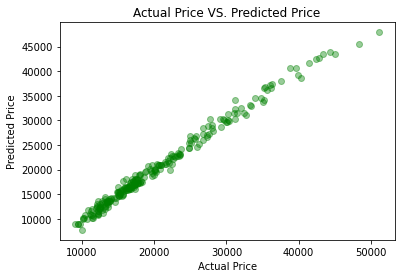

In [ ]:
X = df[['Mileage', 'Cylinder', 'Leather', 'Make', 'Model', 'Trim', 'Type']]
y = df['Price'].values
X = pd.get_dummies(X,columns=[j for j in encode if j in X.columns])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=200)
regressor = linear_model.LinearRegression() 
regressor.fit(X_train,y_train)
y_predict = regressor.predict(X_test)

plt.scatter(y_test,y_predict,color="Green",alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price VS. Predicted Price")
plt.show()

'Mileage', 'Cylinder', 'Leather', 'Make', 'Model' ,'Trim', 'Type' are the best combination of factors for price